In [43]:
import pandas as pd
import numpy as np
df = pd.read_json('../exchange/USD-SEK/data')

In [48]:
df.head()

,close,high,low,open,timestamp,volumn,close_log,time,close_log_linear,close_log_error
0,6.7361,6.7714,6.7174,6.7369,2012-01-26,0.0,1.907481,2012-01-26,1.905177,0.002304
1,6.7841,6.7999,6.7579,6.7870,2012-01-27,0.0,1.914582,2012-01-27,1.905280,0.009302
2,6.7546,6.8024,6.7537,6.7548,2012-01-30,0.0,1.910224,2012-01-30,1.905587,0.004636
3,6.7465,6.8066,6.7163,6.7463,2012-01-31,0.0,1.909024,2012-01-31,1.905690,0.003334
4,6.8039,6.8208,6.7163,6.7463,2012-02-01,0.0,1.917496,2012-02-01,1.905792,0.011704


In [45]:
df = df.dropna() 

In [46]:
df['close_log']=np.log(df['close'])
df['time']=pd.to_datetime(df['timestamp'],unit='s')

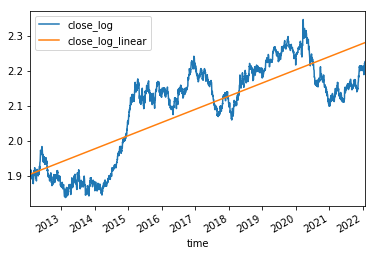

In [47]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df['time'].astype(np.int64).values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df['close_log'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
df['close_log_linear']=Y_pred
df['close_log_error']=df['close_log']-df['close_log_linear']

df.plot(x='time', y=['close_log','close_log_linear'])

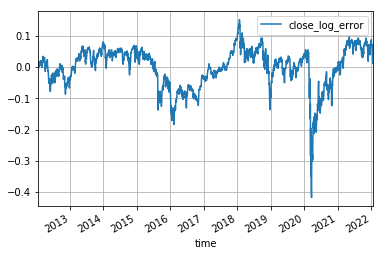

In [41]:
df.plot(x='time', y=['close_log_error'],grid=True)

In [42]:
df.tail()

,close,high,low,open,timestamp,volumn,close_log,time,close_log_linear,close_log_error
2512,35028.648438,35547.828125,35015.488281,35412.300781,2022-01-19 14:30:00,393080000,10.463922,2022-01-19 14:30:00,10.428943,0.034978
2513,34715.390625,35490.199219,34670.121094,35102.660156,2022-01-20 14:30:00,369070000,10.454938,2022-01-20 14:30:00,10.429214,0.025725
2514,34265.371094,34896.671875,34229.550781,34701.691406,2022-01-21 14:30:00,523880000,10.441891,2022-01-21 14:30:00,10.429484,0.012407
2515,34364.500000,34420.988281,33150.328125,34070.609375,2022-01-24 14:30:00,664010000,10.444779,2022-01-24 14:30:00,10.430295,0.014485
2516,34297.730469,34591.039062,33545.519531,34186.640625,2022-01-25 14:30:00,506430000,10.442834,2022-01-25 14:30:00,10.430565,0.012270
